# A\B - test

# Table of contents

I. General Information. Interim conclusions.

II. Data preprocessing. Interim conclusions.

- Columns heading editing.
- Changing the data type.
- Numerical data processing.
    

III. Hypotheses prioritization.

- ICE framework.
- RICE framework.
- Frameworks difference.
- Interim conclusions.    
    
    
IV. A\B-test analysis.

- Cumulative data gathering.
- Calculation of cumulated metrics (revenue, average check, conversion) by test groups. 
- Distribution of the orders number and the orders cost. Percentiles. Outliers detection.
- Statistical significance of the difference in conversion and average between the groups using the raw data.
- Statistical significance of the difference in conversion and average between the groups using the filtered data (without abnormal users).

V. General conclusion and decision based on the test results.

In [1]:
# libraries import
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker 
import seaborn as sns
import scipy.stats as st
import datetime as dt

In [2]:
# pandas customization
pd.set_option('max_colwidth', 400)

In [3]:
# reading the files and saving it to the variables
try:
    hypothesis = pd.read_csv('/home/yuso/jupyter_dir/jupyter_env/datasets/ab_pr/hypothesis_eng.txt', 
                             sep=';')
    visitors = pd.read_csv('/home/yuso/jupyter_dir/jupyter_env/datasets/ab_pr/visitors.csv')
    orders = pd.read_csv('/home/yuso/jupyter_dir/jupyter_env/datasets/ab_pr/orders.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
    orders = pd.read_csv('/datasets/orders.csv')

In [4]:
# custom function for primary data analysis 
def get_info(df):
    percentiles= [.20, .40, .60, .80]
    include=['object', 'float', 'int']
    print(f'\033[0;37;40m Total number of rows: \033[0;0m {df.shape[0]} rows\n \n\033[0;37;40m Total number of columns: \033[0;0m {df.shape[1]} columns\n')
    print('\033[4;37;40m GENERAL INFORMATION \033[0;0m')
    print(df.info(memory_usage='deep'))
    print('\n\033[0;37;40m Top 5 rows: \033[0;0m')
    display(df.head())
    print('\n\033[0;37;40m Last 5 rows: \033[0;0m')
    display(df.tail())
    print('\n\033[0;37;40m Missing values ratio: \033[0;0m')
    print(round(table.isnull().mean() * 100, 2))
    print('\n\033[2;37;40m Duplicates ratio \033[0;0m', '  ', round(table.duplicated().mean() * 100, 2), ' %')
    print('\n\033[0;37;40m Numerical and categorical data summary: \033[0;0m')
    display(pd.DataFrame(df.describe(percentiles = percentiles, include = include).T))

In [5]:
# primary data analysis 
tables = [hypothesis, visitors, orders]
names = ['hypothesis', 'visitors', 'orders']

for name, table in zip(names, tables):
    print(
        f'\n\033[1;30;47m_____________SET:  {name.upper()}_____________\033[0;0m\n')
    get_info(table)
    print ('\n\033[01;30;47m_____________THE END_____________\033[0;0m\n\n') 


_____________SET:  HYPOTHESIS_____________

 Total number of rows:  9 rows
 
 Total number of columns:  5 columns

 GENERAL INFORMATION 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB
None

 Top 5 rows: 


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1



 Last 5 rows: 


,Hypothesis,Reach,Impact,Confidence,Effort
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5



 Missing values ratio: 
Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Effort        0.0
dtype: float64

 Duplicates ratio     0.0  %

 Numerical and categorical data summary: 


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
Hypothesis,9,9,Add two new channels for attracting traffic. This will bring 30% more users,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reach,9.0,NaN,NaN,NaN,4.777778,3.153481,1.0,2.6,3.0,3.0,4.6,8.0,10.0
Impact,9.0,NaN,NaN,NaN,4.777778,3.192874,1.0,2.6,3.0,3.0,4.6,7.8,10.0
Confidence,9.0,NaN,NaN,NaN,5.555556,3.045944,1.0,2.6,4.6,7.0,7.8,8.0,9.0
Effort,9.0,NaN,NaN,NaN,4.888889,2.803767,1.0,3.0,3.4,5.0,5.0,6.8,10.0



_____________THE END_____________



_____________SET:  VISITORS_____________

 Total number of rows:  62 rows
 
 Total number of columns:  3 columns

 GENERAL INFORMATION 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB
None

 Top 5 rows: 


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



 Last 5 rows: 


,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718



 Missing values ratio: 
date        0.0
group       0.0
visitors    0.0
dtype: float64

 Duplicates ratio     0.0  %

 Numerical and categorical data summary: 


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
date,62,31,2019-08-01,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group,62,2,A,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visitors,62.0,NaN,NaN,NaN,607.290323,114.40056,361.0,503.0,600.6,624.5,654.6,717.8,770.0



_____________THE END_____________



_____________SET:  ORDERS_____________

 Total number of rows:  1197 rows
 
 Total number of columns:  5 columns

 GENERAL INFORMATION 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 174.3 KB
None

 Top 5 rows: 


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



 Last 5 rows: 


,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B



 Missing values ratio: 
transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64

 Duplicates ratio     0.0  %

 Numerical and categorical data summary: 


,count,unique,top,freq,mean,std,min,20%,40%,50%,60%,80%,max
transactionId,1197.0,NaN,NaN,NaN,2155621385.529657,1229084904.760058,1062393.0,885010897.8,1734875786.8,2145193898.0,2541704822.2,3464618954.2,4293855558.0
visitorId,1197.0,NaN,NaN,NaN,2165960143.099415,1236014192.14687,5114589.0,887831346.2,1763973164.0,2217984702.0,2600415354.0,3379260072.0,4283872382.0
date,1197,31,2019-08-05,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revenue,1197.0,NaN,NaN,NaN,8348.005848,39191.131774,50.0,990.0,2210.0,2978.0,4483.0,10239.0,1294500.0
group,1197,2,B,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



_____________THE END_____________




**According to the documentation:**

*Set hypothesis:*

- `Hypotheses` — brief descriptions of the hypotheses;
- `Reach` — user reach, on a scale of one to ten;
- `Impact` — impact on users, on a scale of one to ten;
- `Confidence` — confidence in the hypothesis, on a scale of one to ten;
- `Effort` — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

*Set orders:*

- `transactionId` — order identifier;
- `visitorId` — identifier of the user who placed the order;
- `date` — of the order;
- `revenue` — from the order;
- `group` — the A/B test group that the user belongs to.

*Set visitors:*

- `date` — date;
- `group` — A/B test group;
- `visits` — the number of visits on the date specified in the A/B test group specified.

**Brief data analysis:**

- no missing values or duplicates in the data;
- column headings issues: 1) uppercase and lowercase letters; 2) multiple word variables not in 'snake case' style;
- columns with date info with type object - datetime required;
- need to check the unique transaction IDs.

## Interim conclusions

There are 3 dataframes in total, which contain information on hypotheses, orders and visits during the A/B-test. The data is full, there is a mismatch of types in the dates columns. There are 10 hypotheses for prioritization.        
All users are divided in two groups, visit logs for the period from 01-08-2019 to 31-08-2019.       
The total number of transactions made is 1197, for group B - 640. Minimum and maximum order costs differ significantly - 50 RUB and 1,294,500 RUB (average 8348 RUB, but 60% of orders are less than 4,500 RUB), i.e. orders with large amounts distort the average.

It can be argued that currently available data is sufficient for the task. But this data needs to be processed: we need to change the data type and column headings.

# Data preprocessing

## Column headings processing

In [6]:
# transform to lowercase
hypothesis.columns = hypothesis.columns.str.lower()

# check
hypothesis.head(1)

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6


In [7]:
# renaming columns (in the "snake case")
orders.rename(columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace=True)

# check
orders.head(1)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B


## Changing the data type

In [8]:
# to datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

# check
print(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


## Numerical data processing

In [9]:
# min and max order date
print('Minimum order date:', orders['date'].min())
print('Maximum order date:', orders['date'].max())

Minimum order date: 2019-08-01 00:00:00
Maximum order date: 2019-08-31 00:00:00


In [10]:
# number of unique transaction IDs
len(orders['transaction_id'].unique())

1197

*Conclusion: the total number of orders matches with number of unique IDs.*

## Interim conclusions

In this section we've:

- edited some of the column headings according to the naming conventions in Python;
- transformed date and time data to datetime format;
- checked the date columns (min and max values);
- checked unique transaction IDs;

# Hypotheses prioritization

In this section we'll user two frameworks for hypotheses prioritization - ICE and RICE. The result will be stored in a separate columns and sortet by framework scores in descending order. 

These Scoring Models are a relatively quick way to assign a numerical value to different potential projects or ideas to prioritize them based on their relative value, using three\four parameters.

## ICE

*ICE SCORE (impact, confidence, efforts/ease) = Impact * Confidence / Efforts.*

In [11]:
# ice calculation
hypothesis['ice_score'] = round((hypothesis['impact'] * hypothesis['confidence'] / hypothesis['effort']), 2)
hypothesis[['hypothesis', 'ice_score']].sort_values(by='ice_score', ascending=False)

,hypothesis,ice_score
8,Launch a promotion that gives users discounts on their birthdays,16.20
0,Add two new channels for attracting traffic. This will bring 30% more users,13.33
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.20
6,Show banners with current offers and sales on the main page. This will boost conversion,8.00
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.00
1,Launch your own delivery service. This will shorten delivery time,2.00
5,Add a customer review page. This will increase the number of orders,1.33
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.12
4,Change the background color on the main page. This will increase user engagement,1.00


*Conclusion: the most promising for business hypotheses according to the ICE: 8, 0, 7.*

## RICE SCORE

*RICE SCORE (reach, impact, confidence, efforts/ease) = Reach * Impact * Confidence / Efforts.*

In [12]:
# расчет rice
hypothesis['rice_score'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['effort']
hypothesis[['hypothesis', 'reach', 'ice_score', 'rice_score']].sort_values(by='rice_score', ascending=False)

,hypothesis,reach,ice_score,rice_score
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,11.20,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,7.00,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,13.33,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,8.00,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,16.20,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,1.12,9.0
1,Launch your own delivery service. This will shorten delivery time,2,2.00,4.0
5,Add a customer review page. This will increase the number of orders,3,1.33,4.0
4,Change the background color on the main page. This will increase user engagement,3,1.00,3.0


*Conclusion: the most promising for business hypotheses according to the RICE: 7, 2, 0.*

## Frameworks difference

In this section, we will rank each hypothesis for the ICE/RICE frameworks and visualize the difference in their usage.

In [13]:
# hypotheses ranking
hypothesis['rank_ice'] = hypothesis['ice_score'].rank(ascending=True).astype('int')
hypothesis['rank_rice'] = hypothesis['rice_score'].rank(ascending=True).astype('int')
hypothesis.reset_index(inplace=True)
hypothesis.head()

,index,hypothesis,reach,impact,confidence,effort,ice_score,rice_score,rank_ice,rank_rice
0,0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33,40.0,8,6
1,1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00,4.0,4,2
2,2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.00,56.0,5,8
3,3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.12,9.0,2,4
4,4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00,3.0,1,1


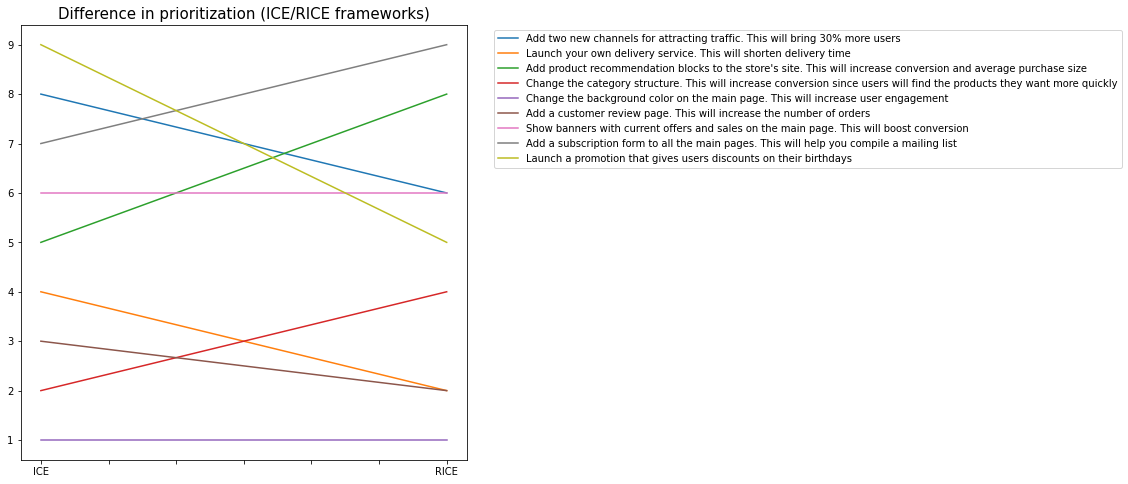

In [14]:
# visualization of rank difference
fig, ax = plt.subplots(1, figsize=(8,8))
for i in range(9):
    temp = hypothesis[hypothesis['index'] == i]
    plt.plot([2, 8], [temp.rank_ice, temp.rank_rice], label=hypothesis['hypothesis'][i])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
x_axis = np.arange(2, 9, 1)
x_values = ['ICE', '', '', '', '', '', 'RICE']
plt.xticks(x_axis, x_values)
plt.title('Difference in prioritization (ICE/RICE frameworks)', fontsize=15);

*Conclusion: only 2 out of 10 hypotheses did not change their rank depending on the framework.*

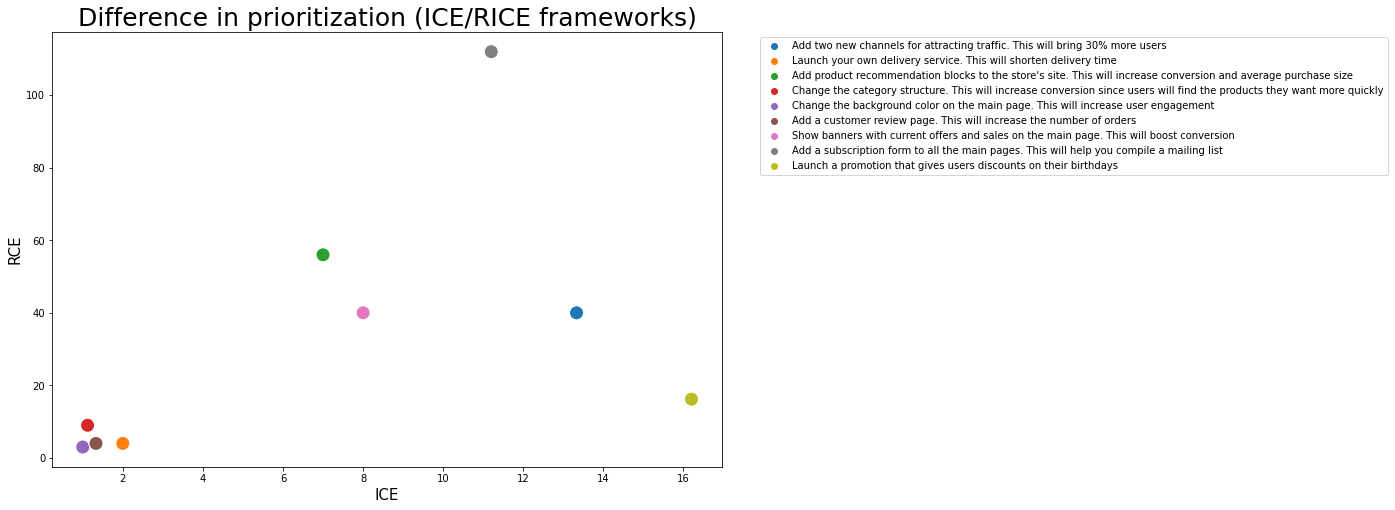

In [15]:
# rank difference scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=hypothesis, x='ice_score', y='rice_score', hue='hypothesis', s=200)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Difference in prioritization (ICE/RICE frameworks)', fontsize=25)
plt.ylabel('RCE', fontsize=15)
plt.xlabel('ICE', fontsize=15)
plt.show()

## Interim conclusions

The priority of hypotheses differs for ICE and RICE frameworks. Hypotheses 7 and 0 are in the top 3 in both cases. The 8th hypothesis is missing in top 3 according to the RICE (and the 2nd appears). In fact, the RICE framework takes into account the *Reach* parameter - how many users will be affected by the change we want to make. 2nd hypothesis has 8\10 reach score, while 8th has only 1\10). This parameter is sufficiently important to prioritise the hypotheses. 

# А/В-test analysis

## Cumulative data gathering

In [16]:
# create an array of unique date and group pairs
date_group = orders[['date', 'group']].drop_duplicates()

In [17]:
# cumulative revenue table
cum_revenue = (date_group
               .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                      .agg({'date':'max', 'group':'max', 'transaction_id':'nunique', 'revenue':'sum'}), axis=1)
               .sort_values(by=['date', 'group']))

print(cum_revenue.shape)
cum_revenue.head()

(62, 4)


,date,group,transaction_id,revenue
55,2019-08-01,A,24,148579
66,2019-08-01,B,21,101217
175,2019-08-02,A,44,242401
173,2019-08-02,B,45,266748
291,2019-08-03,A,68,354874


In [18]:
# cumulative visitors calculation
cum_visitors = (date_group
               .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)
               .sort_values(by=['date', 'group']))

print(cum_visitors.shape)
cum_visitors.head()

(62, 3)


,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [19]:
# tables merge
cum_data = cum_revenue.merge(cum_visitors, left_on=['date', 'group'], right_on=['date', 'group'])
cum_data.rename(columns={'transaction_id':'orders'}, inplace=True)
print(cum_data.shape)
cum_data.head(5)

(62, 5)


,date,group,orders,revenue,visitors
0,2019-08-01,A,24,148579,719
1,2019-08-01,B,21,101217,713
2,2019-08-02,A,44,242401,1338
3,2019-08-02,B,45,266748,1294
4,2019-08-03,A,68,354874,1845


In [20]:
# add average check column (revenue\orders)
cum_data['check'] = cum_data['revenue'] / cum_data['orders'] 

## Calculation of cumulated metrics (revenue, average check, conversion) by test groups.

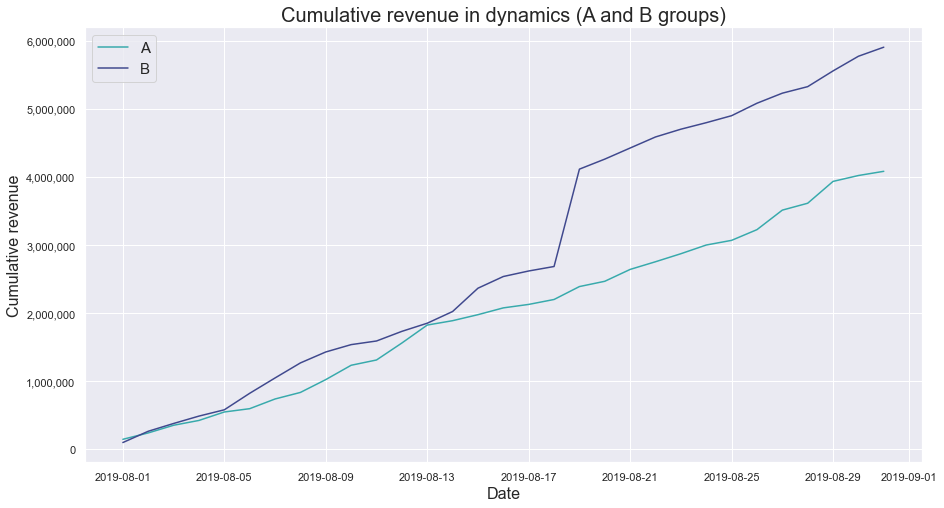

In [21]:
# cumulative revenue visualization
sns.set(rc = {'figure.figsize':(15,8)})
fig, ax = plt.subplots()
fig = sns.lineplot(data=cum_data, x='date', y='revenue', hue='group', palette='mako_r')
plt.title('Cumulative revenue in dynamics (A and B groups)', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Cumulative revenue', fontsize=16)
plt.legend(loc=2, prop={'size': 15})
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

*Conclusion: group A revenue increases consistently throughout the test. Group B revenue increased sharply from 17 to 21 August 2019. This may be because of an increase in orders or very expensive orders in the sample.*

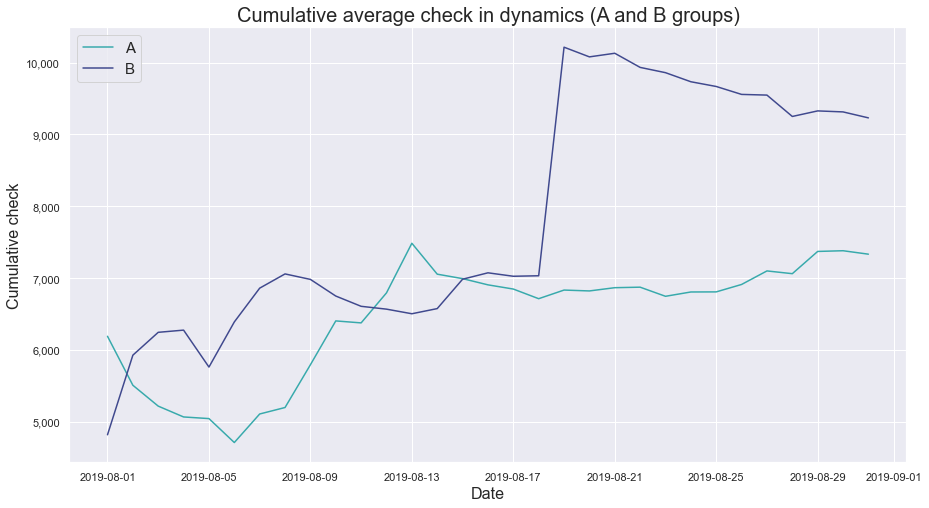

In [22]:
# cumulative average check visualization
fig, ax = plt.subplots()
fig = sns.lineplot(data=cum_data, x='date', y='check', hue='group', palette='mako_r')
plt.title('Cumulative average check in dynamics (A and B groups)', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Cumulative check', fontsize=16)
plt.legend(loc=2, prop={'size': 15})
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

*Conclusion: the average check for both groups stabilized at the end of the test (group B is better than group A). Group B has a peak on the chart, probably because of expensive orders in the middle of the test (the same trend was observed on the cumulated revenue chart).* 

In [23]:
# calculating the relative difference in the cumulated average cheque
check_ratio = cum_data.pivot_table(values='check', index=cum_data['date'], columns='group', aggfunc='first')
check_ratio['ratio'] = check_ratio['B'] / check_ratio['A'] - 1
check_ratio.head()

group,A,B,ratio
date,,,
2019-08-01,6190.791667,4819.857143,-0.221447
2019-08-02,5509.113636,5927.733333,0.075987
2019-08-03,5218.735294,6245.836066,0.196810
2019-08-04,5067.845238,6276.500000,0.238495
2019-08-05,5045.110092,5762.326733,0.142161


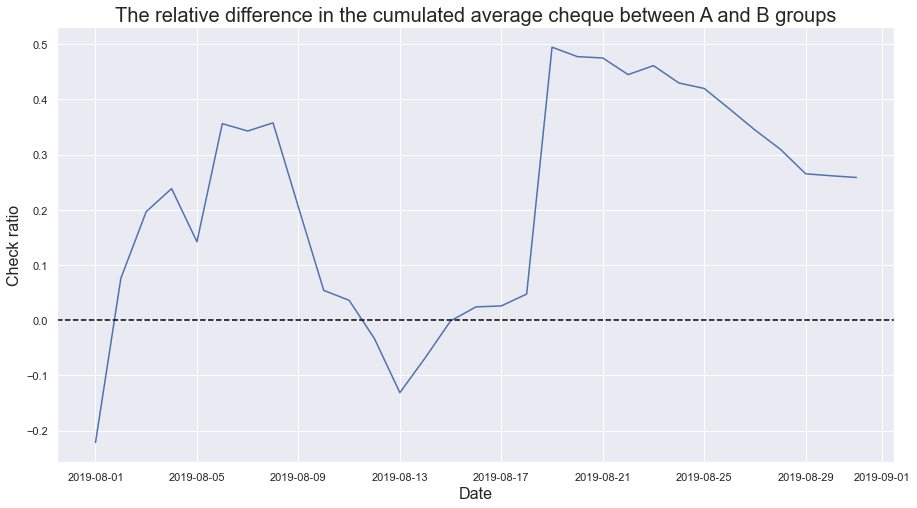

In [24]:
# visualization of the relative difference
fig, ax = plt.subplots()
fig = sns.lineplot(data=check_ratio, x=check_ratio.index, y='ratio', palette='mako_r')
plt.title('The relative difference in the cumulated average cheque between A and B groups', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Сheck ratio', fontsize=16)
plt.axhline(y=0, color='black', linestyle='--');

*Conclusion: in several points, the chart of the differences between the segments jumps abruptly. Most likely, it is affected by expensive orders and outliers.*

In [25]:
# cumulative conversion calculation
cum_data['conversion'] = cum_data['orders'] /cum_data['visitors']
cum_data.head()

,date,group,orders,revenue,visitors,check,conversion
0,2019-08-01,A,24,148579,719,6190.791667,0.033380
1,2019-08-01,B,21,101217,713,4819.857143,0.029453
2,2019-08-02,A,44,242401,1338,5509.113636,0.032885
3,2019-08-02,B,45,266748,1294,5927.733333,0.034776
4,2019-08-03,A,68,354874,1845,5218.735294,0.036856


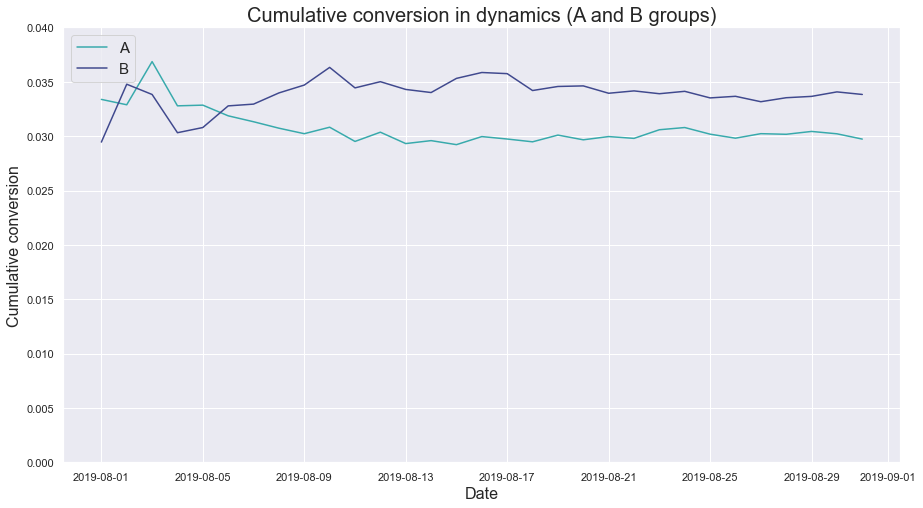

In [26]:
# visualization
fig, ax = plt.subplots()
fig = sns.lineplot(data=cum_data, x='date', y='conversion', hue='group', palette='mako_r')
plt.title('Cumulative conversion in dynamics (A and B groups)', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Cumulative conversion', fontsize=16)
plt.legend(loc=2, prop={'size': 15})
plt.ylim(0, 0.04);

*Conclusion: after fluctuations at the beginning of the test, the conversion of group B started to lead. Then both conversions stabilized.*

In [27]:
# calculating the relative difference in the cumulated conversion
conv_ratio = cum_data.pivot_table(values='conversion', index=cum_data['date'], columns='group', aggfunc='first')
conv_ratio['ratio'] = conv_ratio['B'] / conv_ratio['A'] - 1
conv_ratio.head()

group,A,B,ratio
date,,,
2019-08-01,0.033380,0.029453,-0.117637
2019-08-02,0.032885,0.034776,0.057503
2019-08-03,0.036856,0.033833,-0.082045
2019-08-04,0.032787,0.030315,-0.075398
2019-08-05,0.032851,0.030793,-0.062659


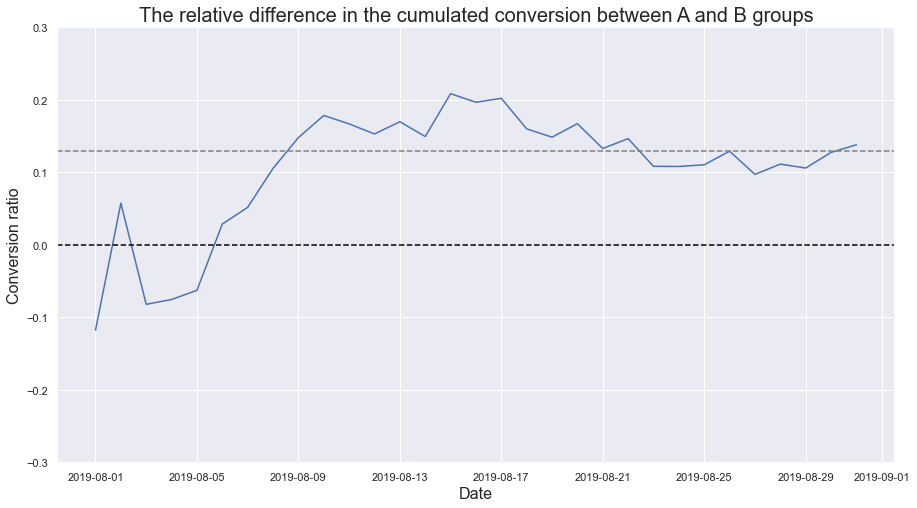

In [28]:
# visualization
fig, ax = plt.subplots()
fig = sns.lineplot(data=conv_ratio, x=conv_ratio.index, y='ratio', palette='mako_r')
plt.title('The relative difference in the cumulated conversion between A and B groups', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Conversion ratio', fontsize=16)
plt.ylim(-0.3, 0.3)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.13, color='grey', linestyle='--');

*Conclusion: at the beginning of the test, group B lost a bit to group A, then broke out and led to the end of the test. One may consider that the conversion ratio is stabilized - group B is better than group A.*

## Distribution of the orders number and the orders cost. Percentiles. Outliers detection.

In [29]:
# number of orders per user
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
orders_by_users.columns = ['user_id', 'orders']
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


*There are users who have made between 5 and 11 orders. Significantly more than the usual user make (1 - 2 orders).*

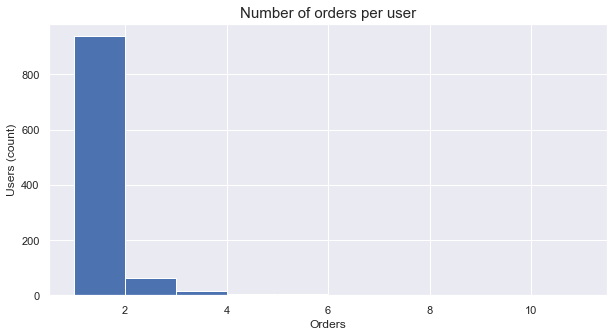

In [30]:
# number of orders per user (histogram)
sns.set(rc = {'figure.figsize':(10,5)})
orders_by_users['orders'].hist()
plt.title('Number of orders per user', fontsize=15)
plt.xlabel('Orders', fontsize=12)
plt.ylabel('Users (count)', fontsize=12);

*Conclusion: Most users ordered only once. However, there are users with 2-4 orders.*

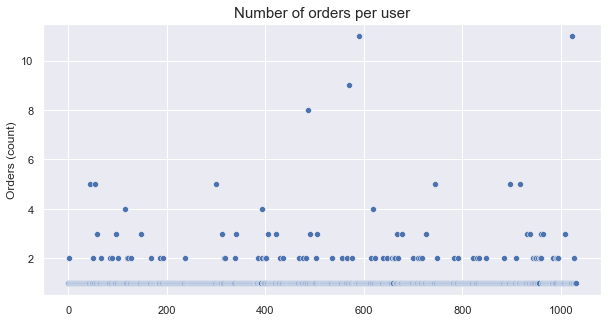

In [31]:
# number of orders per user (scatterplot)
sns.scatterplot(data=orders_by_users, x=pd.Series(range(0,len(orders_by_users))), y='orders')
plt.title('Number of orders per user', fontsize=15)
plt.ylabel('Orders (count)', fontsize=12);

*Conclusion: many users with 2-4 orders. Their exact ratio is not clear - we cannot decide whether they should be considered anomalies or not.*

In [32]:
# 95 and 99 percentiles of orders per user
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


*Conclusion: No more than 5% of users made more than 2 orders, no more than 1% - more than 4. Let's select 2 orders per user as the upper limit, then we will filter the abnormal users on it.*

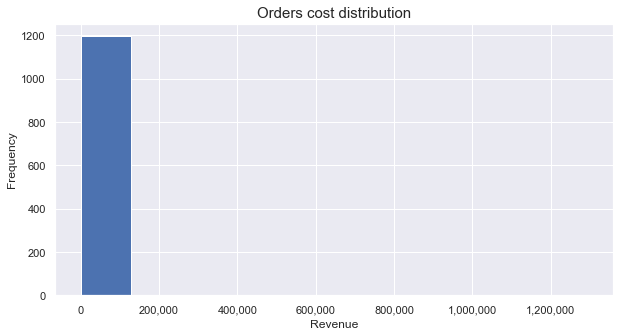

In [33]:
# orders cost distribution (histogram)
fig, ax = plt.subplots()
fig = orders['revenue'].hist()
plt.title('Orders cost distribution', fontsize=15)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));

*Conclusion: most orders do not exceed 200,000 RUB, and the data have outliers.*

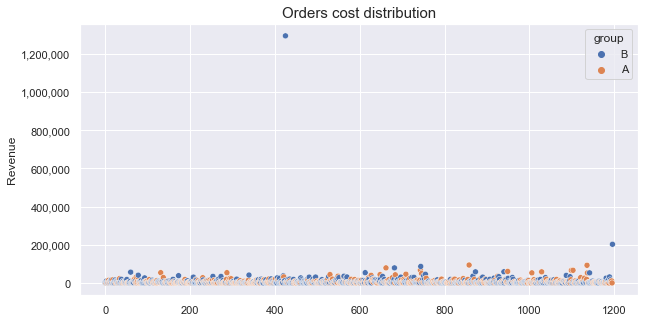

In [34]:
# orders cost (scatterplot)
fig, ax = plt.subplots()
fig = sns.scatterplot(data=orders, x=pd.Series(range(0,len(orders))), y='revenue', hue='group')
plt.title('Orders cost distribution', fontsize=15)
plt.ylabel('Revenue', fontsize=12)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));

*Conclusion: only a few abnormally expensive orders distort the overall picture.*

In [35]:
# 95 and 99 percentiles of orders cost 
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


*Conclusion: no more than 5% of orders are more expensive than 28,000 RUB and no more than 1% more than 58,233 RUB. Let's choose 28,000 RUB at the top of the order cost, filter the abnormal users on this limit.*

## Statistical significance of the difference in conversion and average between the groups using the raw data (with abnormal users).

In this section we will calculate the statistical significance of the differences in conversion and average between the groups on «raw» data - without removing abnormal users.    

Level of significance: *α = 0.05*.

**Let’s formulate H0 and H1 hypotheses (average check):** 

*Null hypothesis: there is no difference in the average between two groups.* 

*Alternate hypothesis: there is a difference in the average between two groups.*   

To calculate the statistical significance of the differences in the average check, we will pass the revenue data to the `mannwhitneyu()` criterion.

In [36]:
# p-value
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

0.729


In [37]:
# relative difference in average
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.259


*Conclusion: p-value is considerably more than 0.05. Therefore, there is no reason to reject the null hypothesis and to assume that there are difference in the average on "raw data". However, the average for group B is significantly higher than the average for group A (25.9% difference).*

**H0 and H1 (average number of orders):** 

*Null hypothesis: there is no difference in the average number of orders between two groups.* 

*Alternate hypothesis: there is a difference in the average number of orders between two groups.* 

In [38]:
# split users in А and В grous
visitors_a= visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_b= visitors[visitors['group'] == 'B'][['date', 'visitors']]

visitors_a.head()

,date,visitors
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [39]:
# for users who have ordered at least once, display the number of orders
orders_a = orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
orders_a.columns = ['visitor_id', 'orders']

orders_b = orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False).agg({'transaction_id': pd.Series.nunique})
orders_b.columns = ['visitor_id', 'orders']

orders_a.head()

,visitor_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


Create `sampleA` and `sampleB` variables where users from different groups will correspond to the number of their orders. Those who have no orders will have zeros. We need this to prepare the samples for the Mann-Whitney test.

The `sampleA` variable will consist of two parts:

List of orders for each user: `orders_a['orders']`.
Zeroes for users who didn’t order anything. Their number equals the difference between the amount of visitors and the number of records about orders: `data['visitors_a']. sum() - len(orders_a['orders'])`. Then combine two arrays with `pd.concat()`.

In [40]:
# create variables
sample_a = (pd.concat([orders_a['orders'], 
                       pd.Series(0, index=np.arange(visitors_a['visitors'].sum() - len(orders_a['orders'])), name='orders')],
                      axis=0))

sample_b = (pd.concat([orders_b['orders'], 
                       pd.Series(0, index=np.arange(visitors_b['visitors'].sum() - len(orders_b['orders'])), name='orders')],
                      axis=0))

In [41]:
# p-value
print("{0:.3f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))

0.017


In [42]:
# relative difference in average number of orders between A and B groups
print("{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

0.138


*Conclusion: p-value is less than 0.05, so there is a difference in the average number of orders for groups A and B according to «raw» data. The null hypothesis is unconfirmed. The increase in the average number of orders of group B to group A is 13.8%.*

## Statistical significance of the difference in conversion and average between the groups using the filtered data (without abnormal users).

Consider for anomalous users who have made more than two orders or made an order more than 28000 RUB (95 percentile). This way we eliminate 5% of the users with the high number of orders and 5% of the users with very expensive orders. Let’s filter our data:

In [43]:
# limits for filtering out anomalous data.
anomaly_revenue = np.percentile(orders['revenue'], [95])[0]
anomaly_orders = np.percentile(orders_by_users['orders'], [95])[0]

In [44]:
# users ID with an anomalous number of orders
many_orders = (pd.concat(
    [
        orders_a[orders_a['orders'] > anomaly_orders]['visitor_id'], 
        orders_b[orders_b['orders'] > anomaly_orders]['visitor_id']
    ], axis=0)
                )

In [45]:
# users ID with too expensive orders
exp_orders = orders[orders['revenue'] > anomaly_revenue]['visitor_id']

In [46]:
# gather all abnormal users
abnormal_users = pd.concat([many_orders, exp_orders], axis=0).drop_duplicates().sort_values()
print(abnormal_users.shape[0])
abnormal_users.to_frame().head()

74


,visitor_id
1099,148427295
18,199603092
928,204675465
23,237748145
37,249864742


*Conclusion: there are 68 abnormal users.*   

Let's filter our data:

In [47]:
# samples of user orders by group (without abnormal users)
sample_a_filtered = (pd.concat(
    [orders_a[np.logical_not(orders_a['visitor_id'].isin(abnormal_users))]['orders'], 
     pd.Series(0, index=np.arange(visitors_b['visitors'].sum() - len(orders_b['orders'])), name='orders')], 
    axis=0)
                    )

sample_b_filtered = (pd.concat(
    [orders_b[np.logical_not(orders_b['visitor_id'].isin(abnormal_users))]['orders'], 
     pd.Series(0, index=np.arange(visitors_b['visitors'].sum() - len(orders_b['orders'])), name='orders')], 
    axis=0)
                    )

**H0 and H1 (average number of orders)**:

*Null hypothesis: there is no difference in the average number of orders between two groups.*

*Alternate hypothesis: there is a difference in the average number of orders between two groups.*

Apply the Mann-Whitney statistical criterion to our samples:

In [48]:
# p-value
print('{0:.3f}'.format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))

0.010


In [49]:
# # relative difference in average number of orders between A and B groups
print('{0:.3f}'.format(sample_b_filtered.mean() / sample_a_filtered.mean() -1))

0.179


*Conclusion: p-value is less than 0.05, so there is a difference in the average number of orders for groups A and B on filtered data. The null hypothesis is unconfirmed. The increase in the average number of orders of group B to group A is 17.8%.*

(62, 5)


,date,group,orders,revenue,visitors
0,2019-08-01,A,16,54351,719
1,2019-08-01,B,19,78258,713
2,2019-08-02,A,35,146483,1338
3,2019-08-02,B,40,171492,1294
4,2019-08-03,A,59,258956,1845


group,A,B,ratio
date,,,
2019-08-01,0.022253,0.026648,0.197493
2019-08-02,0.026158,0.030912,0.181718
2019-08-03,0.031978,0.031059,-0.028737
2019-08-04,0.028103,0.027594,-0.018105
2019-08-05,0.029234,0.028049,-0.040558


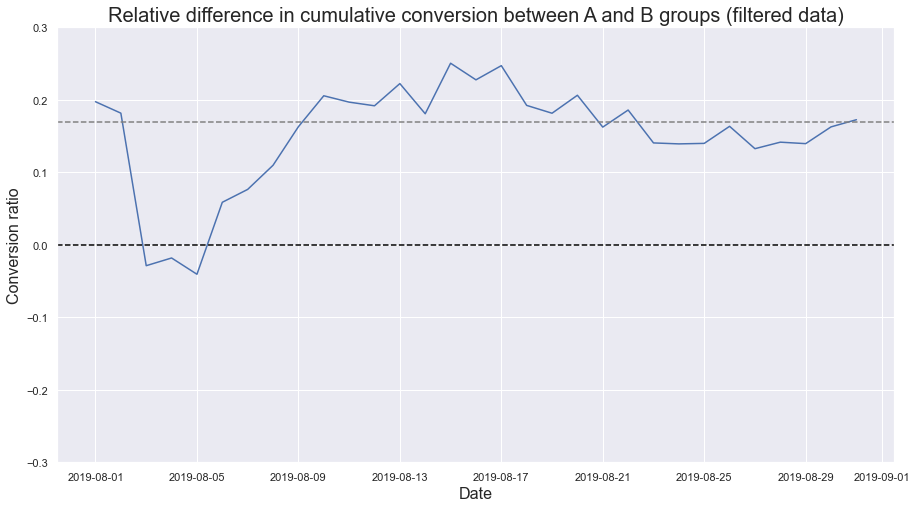

In [50]:
# filter dataframe with orders
orders_filtered = orders[np.logical_not(orders['visitor_id'].isin(abnormal_users))]

# create an array of unique pairs of date and test group
date_group_filtered = orders_filtered[['date', 'group']].drop_duplicates()

# cumulative revenue table
cum_revenue_filtered = (date_group_filtered
               .apply(lambda x: orders_filtered[np.logical_and(orders_filtered['date'] <= x['date'], 
                                                               orders_filtered['group'] == x['group'])]
                      .agg({'date':'max', 'group':'max', 'transaction_id':'nunique', 'revenue':'sum'}), 
                      axis=1)
               .sort_values(by=['date', 'group']))

# cumulative visitors table
cum_visitors_filtered = (date_group_filtered
               .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                        visitors['group'] == x['group'])]
                      .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)
               .sort_values(by=['date', 'group']))

# table merge
cum_data_filtered = (cum_revenue_filtered
                     .merge(cum_visitors_filtered, 
                            left_on=['date', 'group'], 
                            right_on=['date', 'group']))
cum_data_filtered.rename(columns={'transaction_id':'orders'}, inplace=True)
print(cum_data_filtered.shape)
display(cum_data_filtered.head(5))

# add columns with average check (revenue\number of orders) and conversion
cum_data_filtered['check'] = cum_data_filtered['revenue'] / cum_data_filtered['orders'] 
cum_data_filtered['conversion'] = cum_data_filtered['orders'] /cum_data_filtered['visitors']

# calculation of the relative difference in cumulative conversion between two groups
conv_ratio_filtered = (cum_data_filtered
                       .pivot_table(values='conversion', 
                                    index=cum_data_filtered['date'], 
                                    columns='group', 
                                    aggfunc='first'))
conv_ratio_filtered['ratio'] = conv_ratio_filtered['B'] / conv_ratio_filtered['A'] - 1
display(conv_ratio_filtered.head())

# visualization
sns.set(rc = {'figure.figsize':(15,8)})
fig, ax = plt.subplots()
fig = sns.lineplot(data=conv_ratio_filtered, 
                    x=conv_ratio_filtered.index, 
                    y='ratio', 
                    palette='mako_r')
plt.title('Relative difference in cumulative conversion between A and B groups (filtered data)', 
          fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Conversion ratio', fontsize=16)
plt.ylim(-0.3, 0.3)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.17, color='grey', linestyle='--');

*Conclusion: the relative difference in cumulative conversion on "filtered data" B\A is 17% (group B is better). Raw data - 13.8%.*

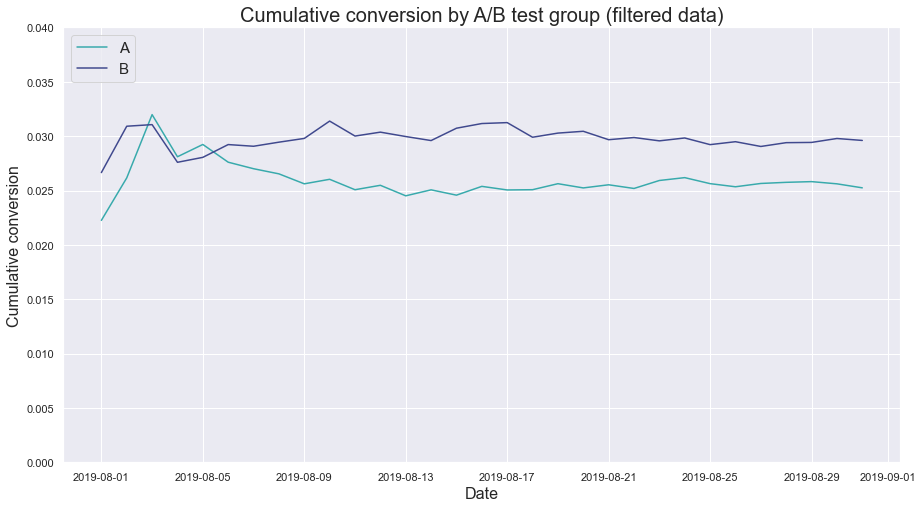

In [51]:
# cumulative conversion dynamics
fig, ax = plt.subplots()
fig = sns.lineplot(data=cum_data_filtered, x='date', y='conversion', hue='group', palette='mako_r')
plt.title('Cumulative conversion by A/B test group (filtered data)', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Cumulative conversion', fontsize=16)
plt.legend(loc=2, prop={'size': 15})
plt.ylim(0, 0.04);

*Conclusion: as for the "raw data", after fluctuations at the beginning of the test, the conversion of group B is better. To the end of the test conversions for both groups were stabilized.*

**Let’s formulate H0 and H1 hypotheses (average check):** 

*Null hypothesis: there is no difference in the average between two groups.* 

*Alternate hypothesis: there is a difference in the average between two groups.*   

To calculate the statistical significance of the differences in the average check, we will pass the revenue data to the `mannwhitneyu()` criterion.

In [52]:
# p-value
print('{0:.3f}'.format(st.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])[1]))

0.738


In [53]:
# difference between the average between A and B groups
print("{0:.3f}".format(
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))
          ]['revenue'].mean() / 
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))
          ]['revenue'].mean()- 1))

-0.020


*Conclusion: p-value changed a little (0.720), but the group B average is less than average for the group A (2.3%). Result: there are no difference between two groups in the average check.*

In [54]:
# calculation of the relative difference in the cumulative average of group B to group A
check_ratio_filtered = cum_data_filtered.pivot_table(values='check', index=cum_data_filtered['date'], columns='group', aggfunc='first')
check_ratio_filtered['ratio'] = check_ratio_filtered['B'] / check_ratio_filtered['A'] - 1
check_ratio_filtered.head()

group,A,B,ratio
date,,,
2019-08-01,3396.937500,4118.842105,0.212516
2019-08-02,4185.228571,4287.300000,0.024388
2019-08-03,4389.084746,5102.500000,0.162543
2019-08-04,4519.041667,5072.690141,0.122515
2019-08-05,4634.938144,4584.989130,-0.010777


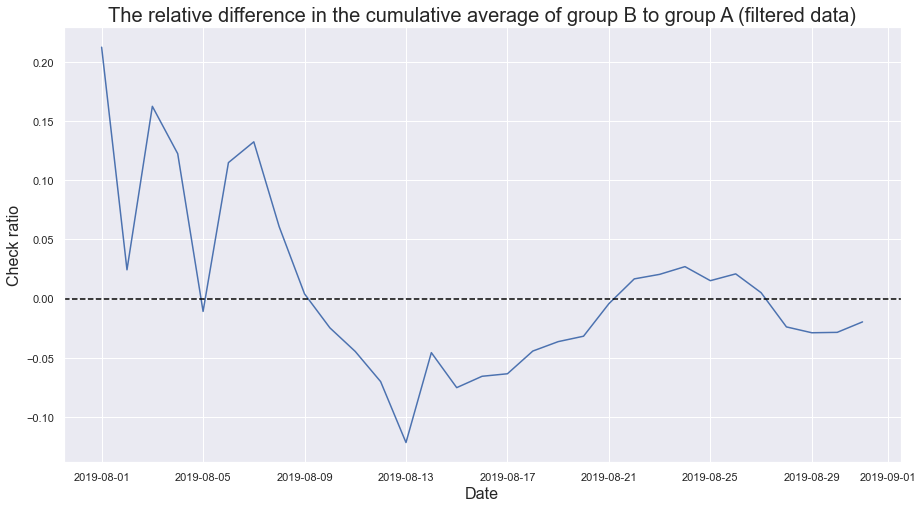

In [55]:
# visualization of the relative difference in the cumulative average of group B to group A
fig, ax = plt.subplots()
fig = sns.lineplot(data=check_ratio_filtered, 
                   x=check_ratio_filtered.index, 
                   y='ratio', 
                   palette='mako_r')
plt.title('The relative difference in the cumulative average of group B to group A (filtered data)', 
          fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Сheck ratio', fontsize=16)
plt.axhline(y=0, color='black', linestyle='--');

*Conclusions: the curve is still fluctuating. We cannot come to a clear conclusion about the chart.*

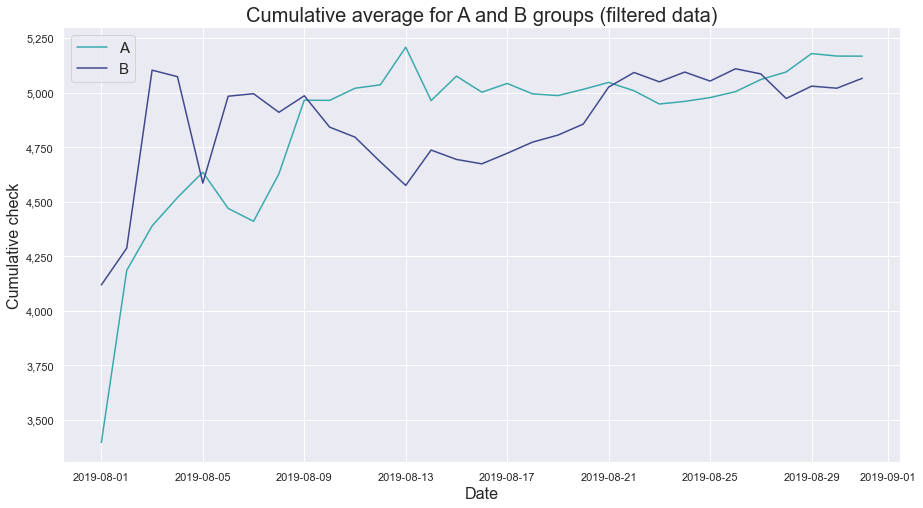

In [56]:
# cumulative average by group
fig, ax = plt.subplots()
fig = sns.lineplot(data=cum_data_filtered, x='date', y='check', hue='group', palette='mako_r')
plt.title('Cumulative average for A and B groups (filtered data)', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Cumulative check', fontsize=16)
plt.legend(loc=2, prop={'size': 15})
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

*Conclusion: at the time of analysis, group A is better, but the average is still fluctuating. Group B’s line has a slight upward trend.*

# General conclusion and decision based on the test results.

<div style="border:solid green 2px; padding: 20px">
    
In this project, we worked as marketing analysts for a big online store. With the marketing department we compiled a list of hypotheses that may help boost revenue and prioritized them. We launched an A/B test, and analyzed the results on "raw" and filtered data.
    
**The main points in data preprocessing:**
    
- editing some of the column headings according to the naming conventions in Python;
- transformation of date and time data to datetime format;
- check the date columns (min and max values);
- check unique transaction IDs;
    
**Hypotheses prioritization**
    
The priority of hypotheses differs for ICE and RICE frameworks. Hypotheses 7 and 0 are in the top 3 in both cases. The 8th hypothesis is missing in top 3 according to the RICE (and the 2nd appears). In fact, the RICE framework takes into account the Reach parameter - how many users will be affected by the change we want to make. 2nd hypothesis has 8\10 reach score, while 8th has only 1\10). This parameter is sufficiently important to prioritise the hypotheses.
    
### Test results analysis
    
**Raw data**

*Average check*

- the cumulative average for both groups is stabilized at the end of the test (group B is better than group A). Group B has a peak on the graph - it may have more expensive orders (the same trend was observed on the cummulative revenue chart);
- on the chart of the relative difference B to A we observe abrupt changes in several points. Most likely, it is affected by expensive orders and outliers.
- according to the Mann–Whitney U test, p-value is significantly greater than 0.05 (level of significance). Therefore, there is no difference between the groups in the average . However, the average for group B is higher than for group A (25.9% difference);

*Conversion*

- after fluctuations it the beginning of the test, the conversion of group B started to lead. Then both conversions stabilized.
- on the relative difference chart B/A group B lost a bit to group A, then broke out and led to the end of the test. One may consider that the conversion ratio is stabilized - group B is better than group A;
- according to the Mann–Whitney U test, p-value less than 0.05, therefore, on «raw» data there is a difference in the average number of orders between groups A and B. The null hypothesis is unconfirmed. The increase in the average number of orders for group B to group A is 13.8%;

**Filtered data**

*Average check*

- at the time of analysis, group A is better, but the average is still fluctuating. Group B’s line has a slight upward trend;
- the curve of the relative difference is still fluctuating. We cannot come to a clear conclusion about the chart;
- p-value changed a little (0.720), but the group B average is less than average for the group A (2.3%).

*Conversion*

- as for the «raw» data, after fluctuations at the beginning of the test, the conversion of group B started to lead. Then both conversions stabilized;
- the relative difference in cumulative conversions on «filtered» data B A is 17% (group B better);
- p-value is less than 0.05, so there are difference in the average number of orders for two The null hypothesis is unconfirmed. The increase in the average number of orders of group B to group A is 17.8%;

### General conclusion
*It is recommended to stop the test and to acknowledge that group B is better (the number of orders in group B is higher on«raw» (by 13.8%) and on filtered (by 17.8%) data in the absence of a statistical difference between the average check for both groups).*